# Exploratory Data Anaylsis - 1994 Census Data

In [2]:
# import libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [3]:
# Importing the Data Set
df_1994 = pd.read_csv('../UCI dataset/adult.csv')
df_1994.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [22]:
df_1994.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [28]:
df_1994.shape

(32561, 15)

In [33]:
df_1994.isnull().sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [102]:
df_1994['income'].value_counts()

<=50K    23068
>50K      7650
Name: income, dtype: int64

In [108]:
(df_1994['income'] == '>50K').sum()/(df_1994['income'] == '>50K').count()

0.24903965101894654

In [35]:
df_1994['age'].nunique()

73

In [36]:
df_1994['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [39]:
df_1994[df_1994['native.country'] == '?'].shape

(583, 15)

In [43]:
for i in df_1994.columns:
    t = df_1994[i].value_counts()
    index = list(t.index)
    print ("? values in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

? values in age
0
? values in workclass
0
? values in fnlwgt
0
? values in education
0
? values in education.num
0
? values in marital.status
0
? values in occupation
0
? values in relationship
0
? values in race
0
? values in sex
0
? values in capital.gain
0
? values in capital.loss
0
? values in hours.per.week
0
? values in native.country
556
? values in income
0


In [4]:
df_1994 = df_1994[df_1994.occupation != '?']

df_1994['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

## Explore Features

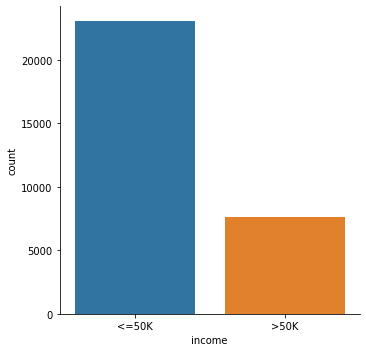

In [5]:
sns.catplot(x="income", kind="count", data=df_1994)

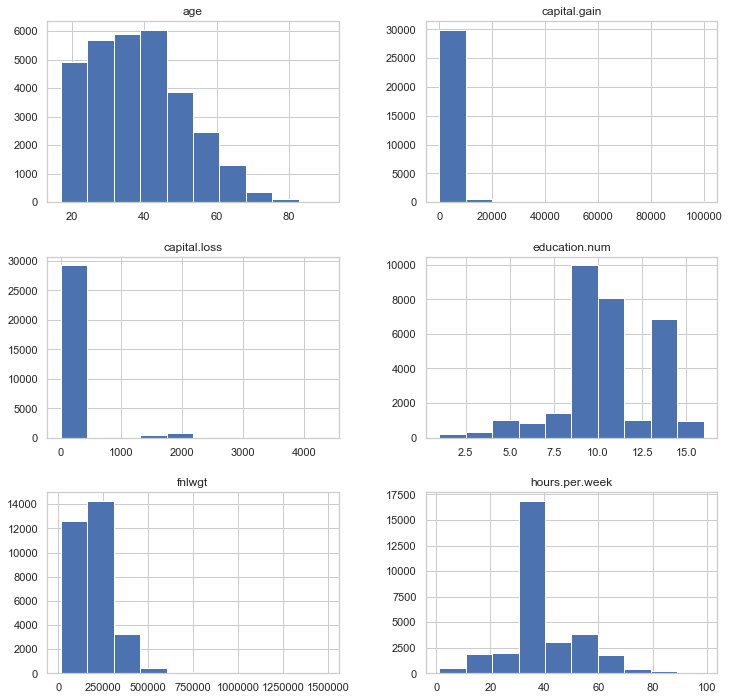

In [56]:
# Distribution of Different Features of the Dataset
distribution = df_1994.hist()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### Distribution of Age

The maximum age is 90
The minimum age is 17


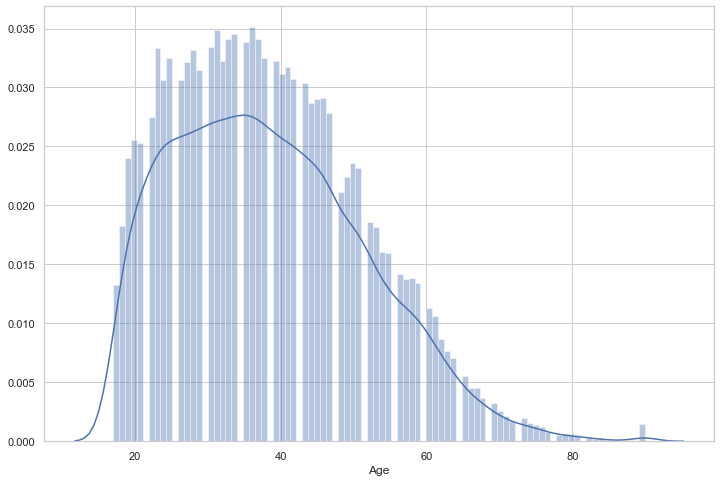

In [52]:
plt.rcParams['figure.figsize'] = [12, 8]

sns.distplot(df_1994['age'], bins = 90)
plt.xlabel("Age")

print ("The maximum age is", df_1994['age'].max())
print ("The minimum age is", df_1994['age'].min())

### Correlation Matrix of Features

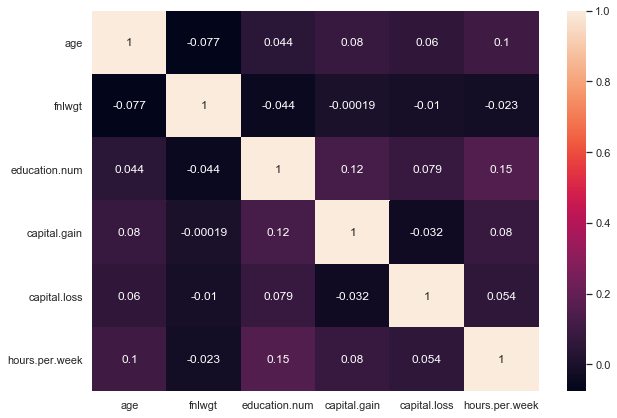

In [61]:
# hours per week
sns.heatmap(df_1994.corr(), annot = True);

### Education vs Hours per Week

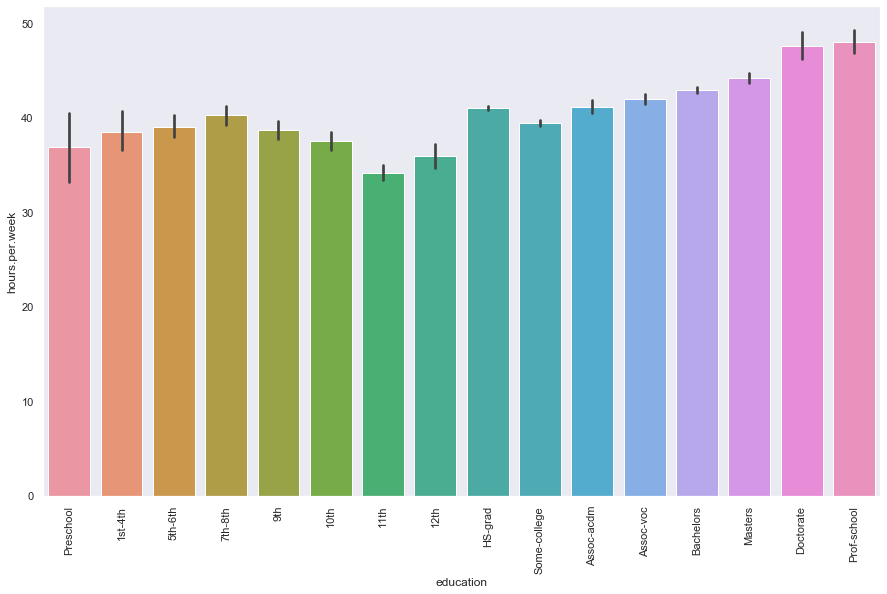

In [91]:
sns_grad = sns.barplot(x = df_1994['education'], y = df_1994['hours.per.week'], data = df_1994, order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school'])
plt.setp(sns_grad.get_xticklabels(), rotation=90);

### Age vs Hours per Week

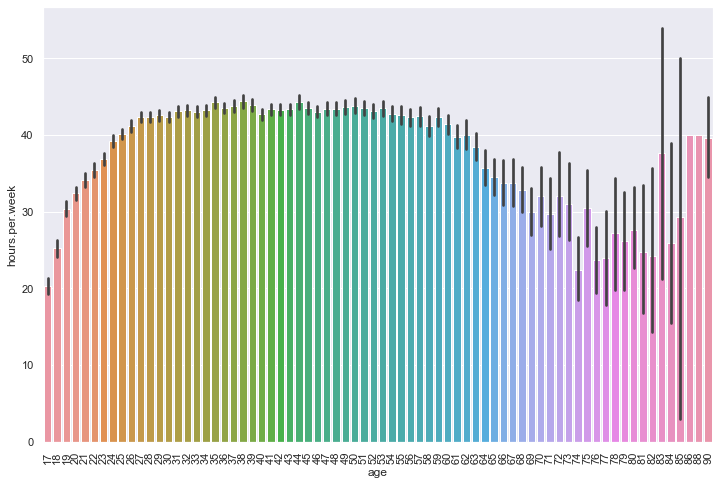

In [73]:
sns_grad = sns.barplot(x = df_1994['age'], y = df_1994['hours.per.week'], data = df_1994)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

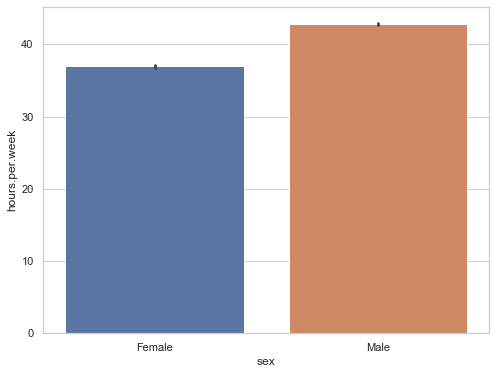

In [77]:
sns.barplot(x = df_1994['sex'], y = df_1994['hours.per.week'], data = df_1994, estimator = mean);

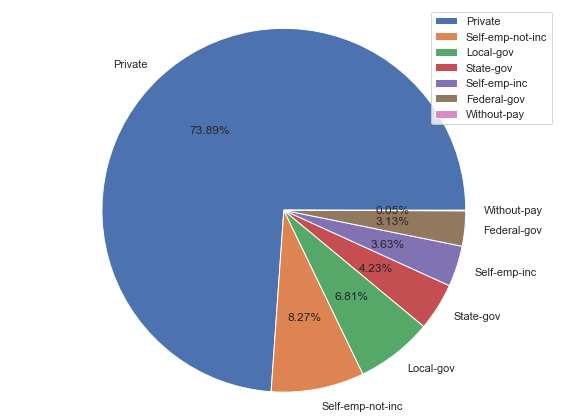

In [86]:
# df_ = df_1994.loc[df_1994['income'] == '>50K',['workclass']]
workclass_types = df_1994['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

plt.pie(aggregate, labels = labels, autopct='%1.2f%%')
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

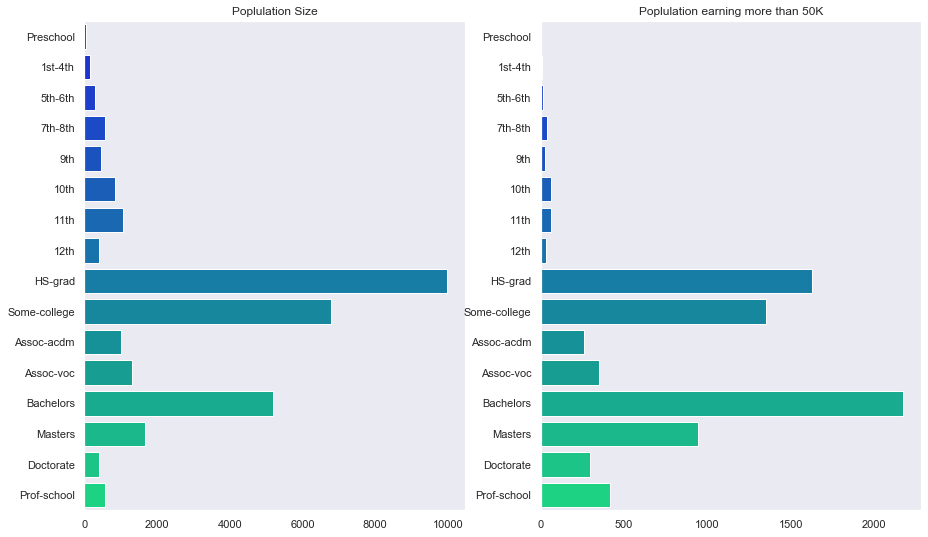

In [93]:
education_size = df_1994.groupby('education').size()

# Grouping people who earns more than 50K by their education
more_income = df_1994.loc[df_1994['income'] == '>50K', ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

ax[0].title.set_text("Poplulation Size")
ax[1].title.set_text("Poplulation earning more than 50K")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school'], ax = ax[1])

In [109]:
df_adult_eda_ = df_1994[df_1994['native.country'] != '?']
native_more = df_1994.loc[df_1994['income'] == '>50K',['native.country']].groupby('native.country').size()
native_less = df_1994.loc[df_1994['income'] == '<=50K',['native.country']].groupby('native.country').size()

index_more = list(native_more.index)
index_less = list(native_less.index)

# Checking if the Countries in both aspects are same or not
print(index_more)
print(len(index_more))
print(index_less)
print(len(index_less))

['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
40
['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
42


In [110]:
[country for country in index_less if country not in index_more]

['Holand-Netherlands', 'Outlying-US(Guam-USVI-etc)']

In [116]:
df_more = pd.DataFrame({'Countries' : index_more, '>50K' : list(native_more) })
df_less = pd.DataFrame({'Countries' : index_less, '<=50K' : list(native_less) })

# Adding the entries of the missing countries
df_more.loc[40] = 'Holand-Netherlands', 0
df_more.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0

# df_more

df_fin = pd.merge(df_less, df_more, on = 'Countries')

# df_fin

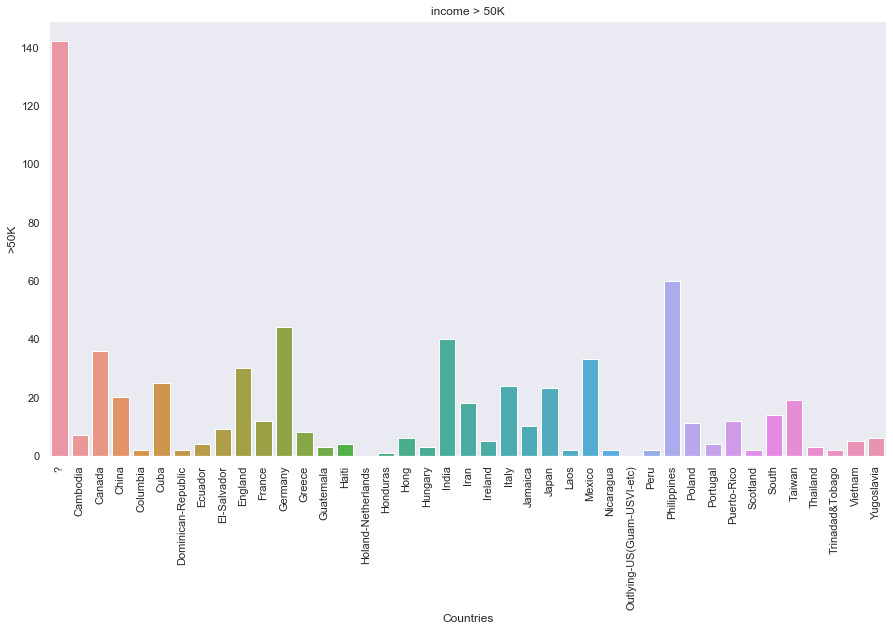

In [123]:
# sns.set(style = 'whitegrid')
# plt.rcParams['figure.figsize'] = [20,10]
# Dropping the United States Row as there's a disparity between US and other Countries
# df_fin = df_fin.drop([38])

# This Bar plot shows which country's people after US make more than 50K a year

sns_ = sns.barplot(x = df_fin.drop([39])['Countries'], y = df_fin.drop([39])['>50K'], data = df_fin)
sns_.title.set_text("income > 50K")

plt.setp(sns_.get_xticklabels(), rotation = 90);

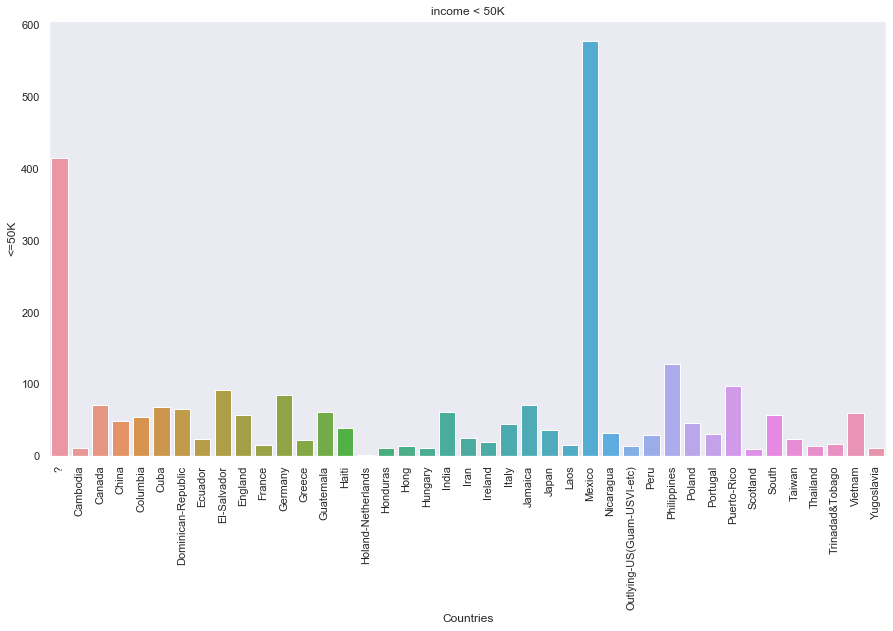

In [125]:
sns__ = sns.barplot(x = df_fin.drop([39])['Countries'], y = df_fin.drop([39])['<=50K'], data = df_fin)
sns__.title.set_text("income < 50K")

plt.setp(sns__.get_xticklabels(), rotation = 90);

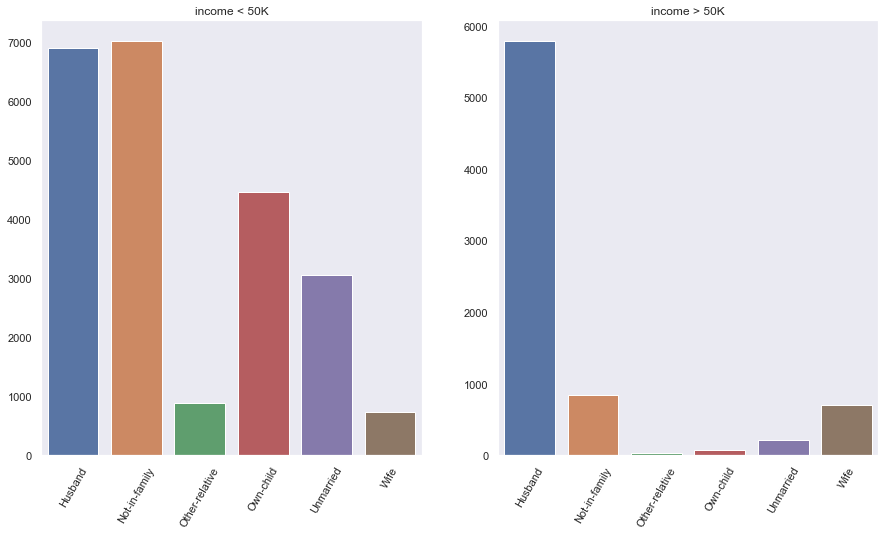

In [126]:
plt.rcParams['figure.figsize'] = [15,8]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].title.set_text("income < 50K")
ax[1].title.set_text("income > 50K")

# Grouping people according to their Income and Relationship Status 
rel_less = df_1994.loc[df_1994['income'] == '<=50K',['relationship']].groupby('relationship').size()
rel_more = df_1994.loc[df_1994['income'] == '>50K',['relationship']].groupby('relationship').size()

# This barplot shows the No.of people earning more or less than 50K according to their Relationship Status
sns_rel_1 = sns.barplot(x = list(rel_less.index), y = list(rel_less), ax = ax[0])
sns_rel_2= sns.barplot(x = list(rel_more.index), y = list(rel_more), ax = ax[1])

plt.setp(sns_rel_1.get_xticklabels(), rotation = 60);
plt.setp(sns_rel_2.get_xticklabels(), rotation = 60);

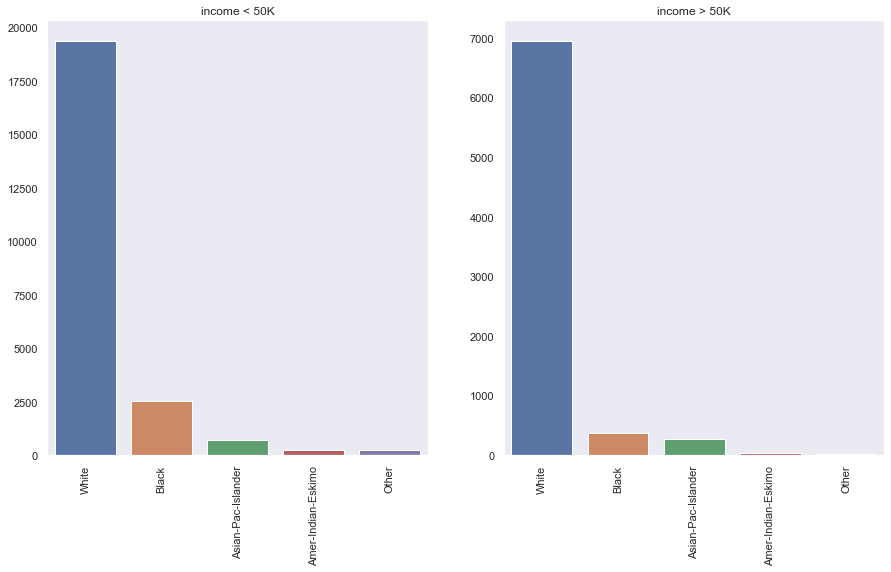

In [127]:
fig, ax = plt.subplots(1,2)
ax[0].title.set_text("income < 50K")
ax[1].title.set_text("income > 50K")

race_less = df_1994.loc[df_1994['income'] == '<=50K'].groupby('race').size()
race_more = df_1994.loc[df_1994['income'] == '>50K'].groupby('race').size()

sns_race_1 = sns.barplot(x = list(race_less.index), y = list(race_less), ax = ax[0],
                         order = ['White', 'Black','Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'])
sns_race_2 = sns.barplot(x = list(race_more.index), y = list(race_more), ax = ax[1],
                        order = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'])

plt.setp(sns_race_1.get_xticklabels(), rotation = 90);
plt.setp(sns_race_2.get_xticklabels(), rotation = 90);